In [1]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = load_wine()
X, y = data.data, data.target 


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transform = StandardScaler()
X = transform.fit_transform(X)
df = pd.DataFrame(X)
df.columns = data.feature_names
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


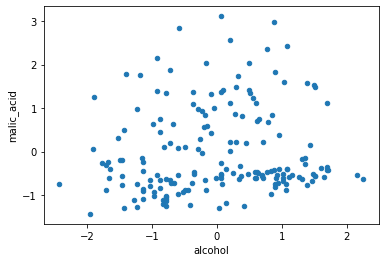

In [4]:
df2 = df[["alcohol", "malic_acid"]]
colors = []
for ci in y:
    if ci == 0:
        colors.append('blue')
    elif ci == 1:
        colors.append('red')
    elif ci == 2:
        colors.append('magenta')

df.plot.scatter("alcohol", "malic_acid")
plt.show()

D:\AppliedDataScience\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


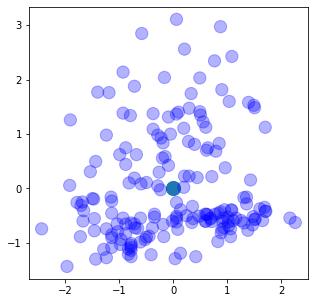

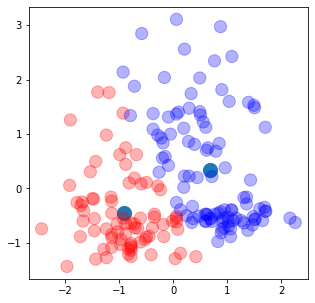

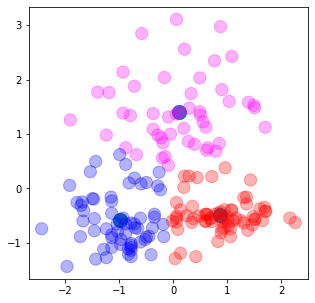

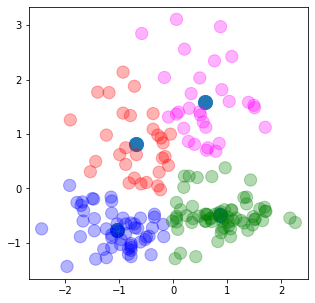

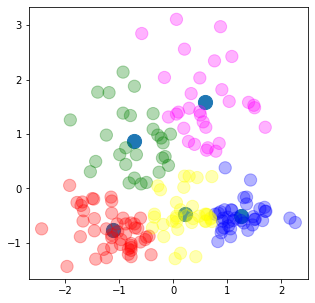

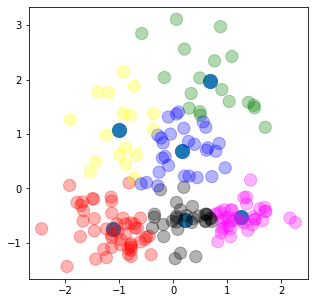

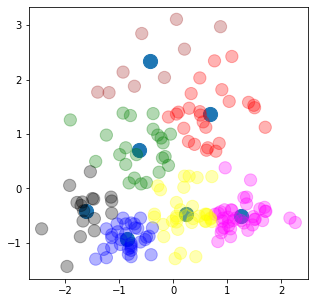

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
ssdist = []
for k in range(1,8):
    clf = KMeans(n_clusters=k)
    clf = clf.fit(df2)

    cluster_colors = []
    for ci in clf.labels_:
        if ci == 0:
            cluster_colors.append('blue')
        elif ci == 1:
            cluster_colors.append('red')
        elif ci == 2:
            cluster_colors.append('magenta')
        elif ci == 3:
            cluster_colors.append('green')
        elif ci == 4:
            cluster_colors.append('yellow')
        elif ci == 5:
            cluster_colors.append('black')
        elif ci == 6:
            cluster_colors.append('brown')
        elif ci == 7:
            cluster_colors.append('cyan')
    _ = plt.figure(figsize=(5, 5))
    plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], s=200)
    plt.scatter(df['alcohol'], df['malic_acid'], c=cluster_colors, alpha=0.3, s=150)
    # plt.scatter(df['alcohol'], df['color_intensity'], c=colors, s=10, alpha=0.8)
    plt.show()

    distortions.append(sum(np.min(cdist(df2, clf.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    ssdist.append(clf.inertia_)

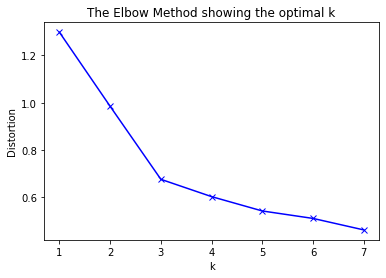

In [6]:
plt.plot(range(1, 8), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

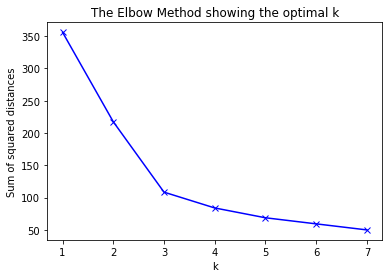

In [7]:
plt.plot(range(1, 8), ssdist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

CANCER

In [8]:
data = load_breast_cancer()
X, y = data.data, data.target 

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transform = StandardScaler()
X = transform.fit_transform(X)
df = pd.DataFrame(X)
df.columns = data.feature_names
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


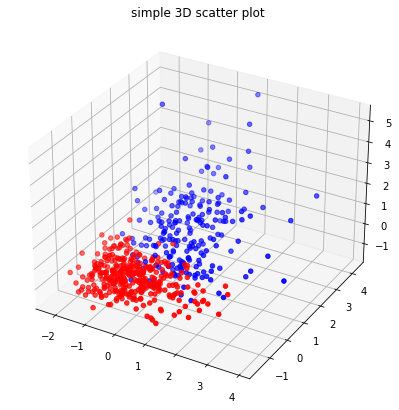

In [17]:
df2 = df[["worst texture", "worst perimeter", "mean area"]]
colors = []
for ci in y:
    if ci == 0:
        colors.append('blue')
    elif ci == 1:
        colors.append('red')
    elif ci == 2:
        colors.append('magenta')

#df.plot.scatter("worst texture", "worst perimeter", "mean area")
#plt.show()

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df["worst texture"], df["worst perimeter"], df["mean area"], color = colors)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

D:\AppliedDataScience\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


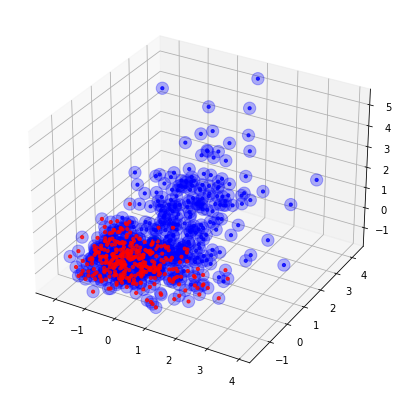

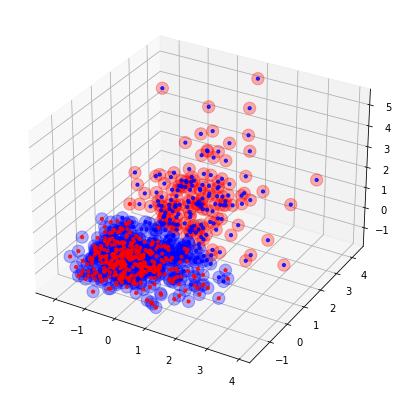

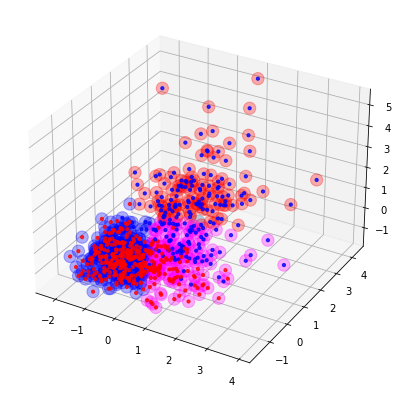

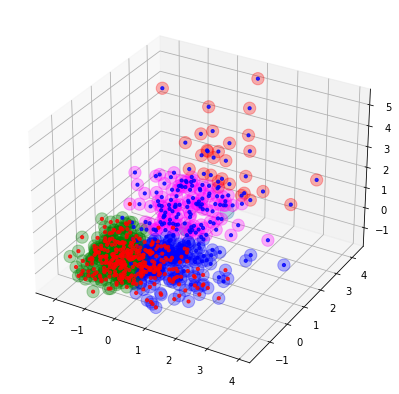

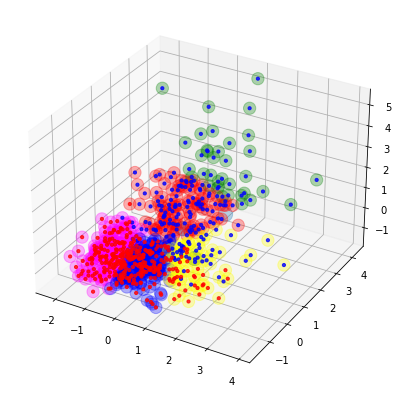

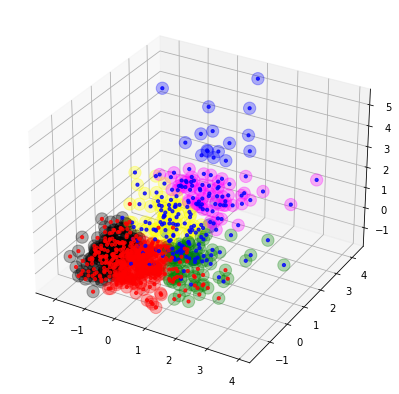

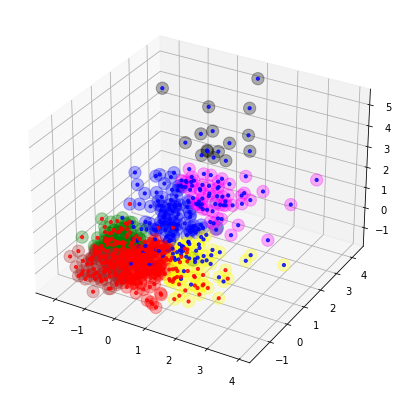

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
ssdist = []
for k in range(1,8):
    clf = KMeans(n_clusters=k)
    clf = clf.fit(df2)

    cluster_colors = []
    for ci in clf.labels_:
        if ci == 0:
            cluster_colors.append('blue')
        elif ci == 1:
            cluster_colors.append('red')
        elif ci == 2:
            cluster_colors.append('magenta')
        elif ci == 3:
            cluster_colors.append('green')
        elif ci == 4:
            cluster_colors.append('yellow')
        elif ci == 5:
            cluster_colors.append('black')
        elif ci == 6:
            cluster_colors.append('brown')
        elif ci == 7:
            cluster_colors.append('cyan')
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], s=200)
    ax.scatter3D(df['worst texture'], df['worst perimeter'], df['mean area'], c=cluster_colors, alpha=0.3, s=150)
    ax.scatter3D(df['worst texture'], df['worst perimeter'], df["mean area"], c=colors, s=10, alpha=0.8)
    plt.show()

    distortions.append(sum(np.min(cdist(df2, clf.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    ssdist.append(clf.inertia_)

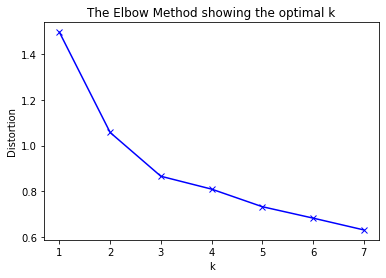

In [20]:
plt.plot(range(1, 8), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

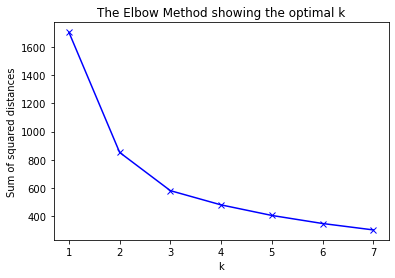

In [21]:
plt.plot(range(1, 8), ssdist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()